In [1]:
# 필요한 라이브러리 불러오기

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler


In [2]:
# 아이리스 데이터 로드
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [3]:
# PCA 모델 생성 및 학습
pca = PCA(n_components=2)  # 2개의 주성분으로 차원 축소
X_pca = pca.fit_transform(X_scaled)

# 주성분 점수 DataFrame 생성
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['target'] = y


### pca 시각화

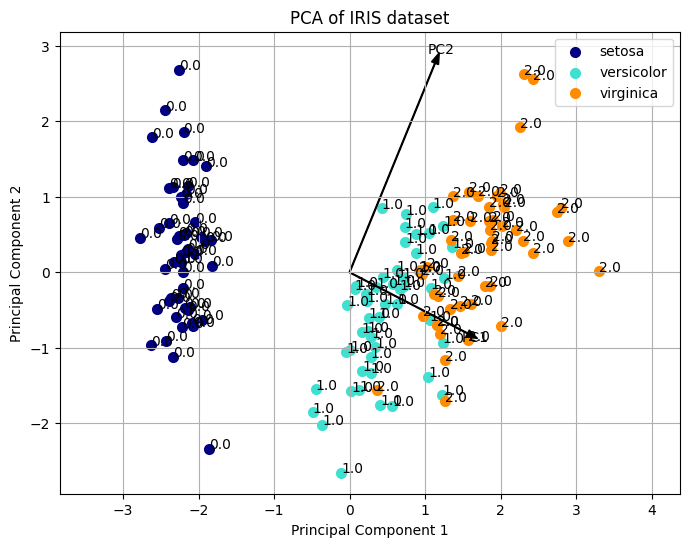

In [4]:
# 색상 지정
colors = ['navy', 'turquoise', 'darkorange']

# 주성분 분석 결과 시각화
plt.figure(figsize=(8, 6))
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(pca_df.loc[pca_df['target'] == i, 'PC1'], pca_df.loc[pca_df['target'] == i, 'PC2'],
                color=color, lw=2, label=target_name)

# 포인트 레이블 추가 (옵션)
for i, point in pca_df.iterrows():
    plt.text(point['PC1'], point['PC2'], str(point['target']))

# Add arrows to show the principal components
mean_vec = np.mean(X_scaled, axis=0)
for i, v in enumerate(pca.components_):
    plt.arrow(mean_vec[0], mean_vec[1], v[0]*3, v[1]*3, color='black', width=0.01, head_width=0.1)
    plt.text(v[0]*3.2, v[1]*3.2, f"PC{i+1}", color='black', ha='center', va='center')


plt.title('PCA of IRIS dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.axis('equal')  # x축과 y축의 스케일을 동일하게
plt.grid(True)
plt.show()
